### Name : Ankit Singh
### Regd : 2041019276
### Section : CSD - D
### Subject : IDSUP 

## IDSUP Major Assignment-2

‘mark.txt’ is a csv file containing the results of 15 students. For example, the first student has four marks in
math, three marks in CS, and his result is Fail.

1. Write a python program to read the csv file ‘mark.txt’.

2. Write a python program to make a list math marks by reading math marks from csv file ‘mark.txt’.
Similarly, make a list CS marks by reading CS marks from csv file ‘mark.txt’. Write a python program
to make a scatter plot by taking two lists math marks and CS marks.

['4', '3', 'result-Fail']
['4', '4', 'result-Fail']
['3', '3', 'result-Fail']
['3', '4', 'result-Fail']
['6', '7', 'result-Pass']
['7', '6', 'result-Pass']
['7', '7', 'result-Pass']
['7', '8', 'result-Pass']
['8', '8', 'result-Pass']
['8', '7', 'result-Pass']
['5', '5', 'result-Fail']
['4', '5', 'result-Fail']
['5', '4', 'result-Fail']
['8', '8', 'result-Pass']
['9', '9', 'result-Pass']


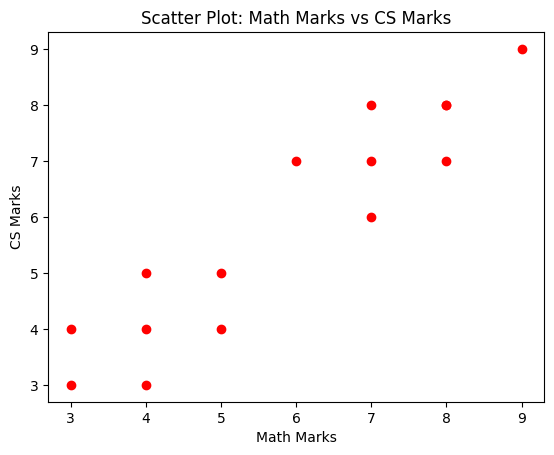

In [6]:
import csv
import matplotlib.pyplot as plt

filename = 'mark.txt'
math_marks = []
cs_marks = []

with open(filename, 'r') as file:
    csv_reader = csv.reader(file)
    next(csv_reader)  
    #By using the next() function before the for loop, we skip the first row (column headers) and start reading the marks from the subsequent rows. 
    #This should prevent the ValueError related to converting the column headers to float values.
    
    for row in csv_reader:
        print(row)
        math_marks.append(float(row[0]))  
        cs_marks.append(float(row[1]))  

plt.scatter(math_marks, cs_marks , color='red', marker='o')
plt.xlabel('Math Marks')
plt.ylabel('CS Marks')
plt.title('Scatter Plot: Math Marks vs CS Marks')
plt.show()

In [2]:
data = []
with open('mark.txt', 'r') as file:
    lines = file.readlines()
    for line in lines[1:]:  # Skip the first line
        math, cs, result = line.strip().split(',')
        data.append([float(math), float(cs), result])

X = [[point[0], point[1]] for point in data]  # Features
y = [point[2] for point in data]             # Target variable

normalized_X = []
for point in X:
    math_normalized = (point[0] - min(X, key=lambda x: x[0])[0]) / (max(X, key=lambda x: x[0])[0] - min(X, key=lambda x: x[0])[0])
    cs_normalized = (point[1] - min(X, key=lambda x: x[1])[1]) / (max(X, key=lambda x: x[1])[1] - min(X, key=lambda x: x[1])[1])
    normalized_X.append([math_normalized, cs_normalized])
def euclidean_distance(p1, p2):
    return ((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2) ** 0.5
k = 3  # Number of neighbors

def predict_result(new_student):
    distances = []
    for i in range(len(normalized_X)):
        distance = euclidean_distance(new_student, normalized_X[i])
        distances.append((distance, y[i]))
    
    sorted_distances = sorted(distances)[:k]
    result_counts = {}
    for _, result in sorted_distances:
        result_counts[result] = result_counts.get(result, 0) + 1
    
    predicted_result = max(result_counts, key=result_counts.get)
    return predicted_result

new_student = [6, 8]  # New student's marks
new_student_normalized = [(new_student[0] - min(X, key=lambda x: x[0])[0]) / (max(X, key=lambda x: x[0])[0] - min(X, key=lambda x: x[0])[0]),
                          (new_student[1] - min(X, key=lambda x: x[1])[1]) / (max(X, key=lambda x: x[1])[1] - min(X, key=lambda x: x[1])[1])]

prediction = predict_result(new_student_normalized)
print("Predicted Result:", prediction)


Predicted Result: result-Pass
